# Pymaceuticals Inc.
---

### Analysis

### High-Level Summary of Capomulin vs Other Treatments

- Capomulin was found to be a more effective treatment regimen for SCC tumors in the studied mice than 7 other treatments in reducing tumor volume.  
- Capomulin had similar efficacy as Ramicane in terms of tumor volume mean, median, variance, standard deviation and SEM, while seven treatments had results similar to a placebo.  
- We observed a correlation between mouse weight and average tumor volume for mice in the Capomulin group, which may bear further investigation.  

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
studydata_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer', indicator=True)

# Verify no missing data is missing from outer join, by printing any rows where the "_merge" column does not contain "both":
studydata_df[studydata_df['_merge' ].str.contains("both") == False]

# Enable printing all rows
# pd.set_option('display.max_rows', None)

# Reset to default 10 rows displayed
pd.set_option('display.max_rows', 10)

# Display the data table for preview
studydata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),_merge
0,b128,0,45.000000,0,Capomulin,Female,9,22,both
1,b128,5,45.651331,0,Capomulin,Female,9,22,both
2,b128,10,43.270852,0,Capomulin,Female,9,22,both
3,b128,15,43.784893,0,Capomulin,Female,9,22,both
4,b128,20,42.731552,0,Capomulin,Female,9,22,both
...,...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17,both
1889,m601,30,31.758275,1,Capomulin,Male,22,17,both
1890,m601,35,30.834357,1,Capomulin,Male,22,17,both
1891,m601,40,31.378045,1,Capomulin,Male,22,17,both


In [3]:
# Checking the number of mice.
mice_count = len(pd.unique(studydata_df['Mouse ID']))
print (mice_count)

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = pd.unique(studydata_df[studydata_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'])
print(dup_mouse_id)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
pd.set_option('display.max_rows', 20)

studydata_df.loc[studydata_df['Mouse ID'] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),_merge
860,g989,0,45.000000,0,Propriva,Female,21,26,both
861,g989,0,45.000000,0,Propriva,Female,21,26,both
862,g989,5,48.786801,0,Propriva,Female,21,26,both
863,g989,5,47.570392,0,Propriva,Female,21,26,both
864,g989,10,51.745156,0,Propriva,Female,21,26,both
865,g989,10,49.880528,0,Propriva,Female,21,26,both
866,g989,15,51.325852,1,Propriva,Female,21,26,both
867,g989,15,53.442020,0,Propriva,Female,21,26,both
868,g989,20,55.326122,1,Propriva,Female,21,26,both
869,g989,20,54.657650,1,Propriva,Female,21,26,both


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = studydata_df.loc[studydata_df['Mouse ID'] != "g989"]
clean_df.loc[clean_df['Mouse ID'] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),_merge


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(pd.unique(clean_df['Mouse ID']))
print (mice_count)

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_group = clean_df.groupby(['Drug Regimen'])

tumor_volume_mean = summary_group[["Drug Regimen", "Tumor Volume (mm3)"]].mean()
tumor_volume_median = summary_group[["Drug Regimen", "Tumor Volume (mm3)"]].median()
tumor_volume_var = summary_group[["Drug Regimen", "Tumor Volume (mm3)"]].var()
tumor_volume_std = summary_group[["Drug Regimen", "Tumor Volume (mm3)"]].std()
tumor_volume_sem = summary_group[["Drug Regimen", "Tumor Volume (mm3)"]].sem()

summary_df = pd.concat([tumor_volume_mean, tumor_volume_median, tumor_volume_var, tumor_volume_std, tumor_volume_sem], axis=1)
summary_df.columns.values[0] = "Mean Tumor Volume"
summary_df.columns.values[1] = "Median Tumor Volume"
summary_df.columns.values[2] = "Tumor Volume Variance"
summary_df.columns.values[3] = "Tumor Volume Std. Dev."
summary_df.columns.values[4] = "Tumor Volume Std. Err."

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_group.agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64


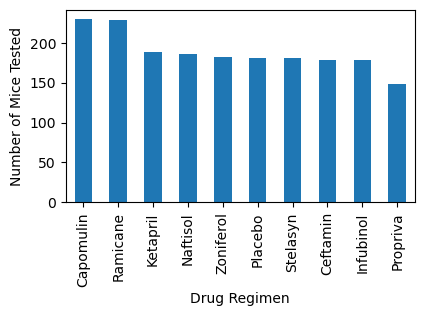

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_summary_group = clean_df.groupby(['Drug Regimen'])
timepoint_count = mice_summary_group["Timepoint"].count().sort_values(ascending=False)

print(timepoint_count)

timepoint_count.plot(kind="bar", figsize=(4.5,2.5), ylabel="Number of Mice Tested")
plt.show()

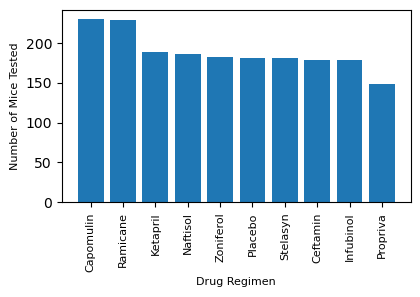

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import numpy as np

regimens = pd.unique(studydata_df['Drug Regimen'])

mice_summary_group = clean_df.groupby(['Drug Regimen'])
timepoint_count = mice_summary_group["Timepoint"].count().sort_values(ascending=False)

# Set the size of the chart:
f = plt.figure()
f.set_figwidth(4.5)
f.set_figheight(2.5)

# plt.bar(timepoint_count.index, timepoint_count)
plt.bar(timepoint_count.index, timepoint_count)
plt.xticks(regimens, rotation=90, fontsize=8)
plt.xlabel("Drug Regimen", fontsize=8)
plt.ylabel("Number of Mice Tested", fontsize=8)
plt.show()


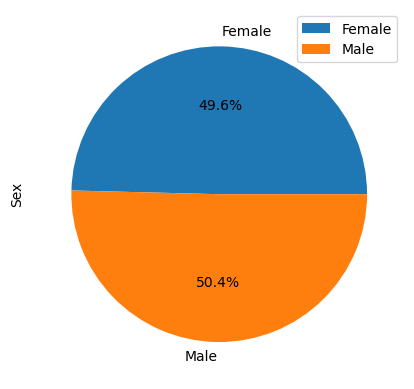

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# sex_df = clean_df[["Mouse ID", "Sex"]].drop_duplicates()
sex_df = clean_df[["Mouse ID", "Sex"]].drop_duplicates().reset_index(drop=True)

# group by an aggregation:
sex_group = sex_df.groupby(['Sex']).count()
# print(sex_group)

sex_group.plot(kind="pie", y="Mouse ID", ylabel="Sex", autopct='%1.1f%%')
plt.show()

# This also works:
# sex_df.groupby(['Sex']).size().plot.pie(ylabel="Sex", autopct="%1.1f%%", figsize=(4,4))

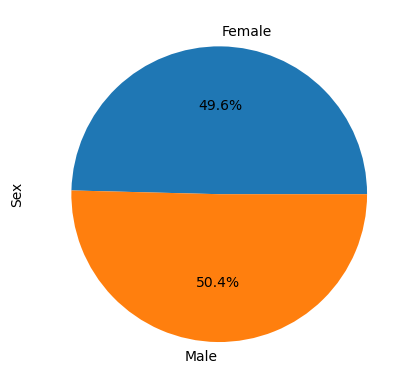

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(sex_group['Mouse ID'], labels=sex_group.index, autopct="%1.1f%%" )
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
clean_df_groupby_mouse = clean_df.groupby(["Mouse ID"])

# clean_df_groupby_mouse.indices
timepoint_max_df = clean_df_groupby_mouse["Timepoint"].max()
# timepoint_max_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(timepoint_max_df,clean_df,on=["Mouse ID","Timepoint"],how="inner")
last_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),_merge
0,a203,45,67.973419,2,Infubinol,Female,20,23,both
1,a251,45,65.525743,1,Infubinol,Female,21,25,both
2,a262,45,70.717621,4,Placebo,Female,17,29,both
3,a275,45,62.999356,3,Ceftamin,Female,20,28,both
4,a366,30,63.440686,1,Stelasyn,Female,16,29,both
...,...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26,both
244,z578,45,30.638696,0,Ramicane,Male,11,16,both
245,z581,45,62.754451,3,Infubinol,Female,24,25,both
246,z795,45,65.741070,3,Naftisol,Female,13,29,both


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatments_df = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == treatment,["Tumor Volume (mm3)"]]
                          
    # add subset 
    # Determine outliers using upper and lower bounds
    quartiles = treatments_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5*iqr
    upper_bound = upperq + 1.5*iqr
    # print(treatments_df)
    print(f"{treatment} IQR is {iqr}")

    outliers = treatments_df.loc[treatments_df["Tumor Volume (mm3)"] < lower_bound]
    if outliers.empty :
        print(f"{treatment} has no outiers\n")
    else:
        print(f"{treatment}'s potential outliers:\n {outliers}\n")    

Capomulin IQR is 7.781863460000004
Capomulin has no outiers

Ramicane IQR is 9.098536719999998
Ramicane has no outiers

Infubinol IQR is 11.477135160000003
Infubinol's potential outliers:
     Tumor Volume (mm3)
31           36.321346

Ceftamin IQR is 15.577752179999997
Ceftamin has no outiers



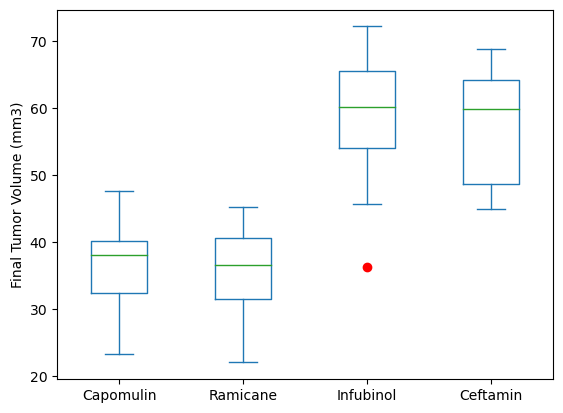

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Create data frames with the tumor volumes for each treatment:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
capomulin_df = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == treatments[0],["Tumor Volume (mm3)"]].reset_index(drop=True)
ramicane_df = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == treatments[1],["Tumor Volume (mm3)"]].reset_index(drop=True)
infubinol_df = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == treatments[2],["Tumor Volume (mm3)"]].reset_index(drop=True)
ceftamin_df = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == treatments[3],["Tumor Volume (mm3)"]].reset_index(drop=True)

# Concatenate the dataframes:
treatments_df = capomulin_df[["Tumor Volume (mm3)"]]
treatments_df.columns = ["Capomulin"]
treatments_df["Ramicane"] = ramicane_df[["Tumor Volume (mm3)"]]
treatments_df["Infubinol"] = infubinol_df[["Tumor Volume (mm3)"]]
treatments_df["Ceftamin"] = ceftamin_df[["Tumor Volume (mm3)"]]

# Create the box plots:
ax = treatments_df.plot(kind="box",sym="r")
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

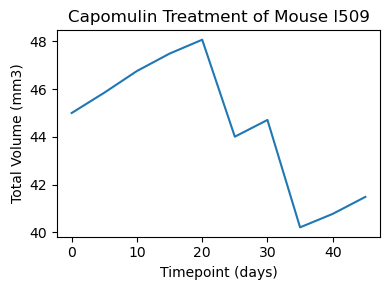

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_df = clean_df.loc[clean_df["Mouse ID"] == "l509"]
plt.figure(figsize=(4,3))
plt.plot(mouse_df["Timepoint"],mouse_df["Tumor Volume (mm3)"])
plt.xlabel('Timepoint (days)')
plt.ylabel('Total Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')
plt.tight_layout()
plt.show()

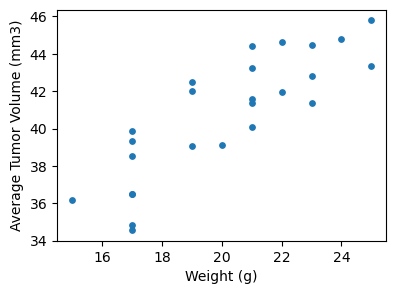

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_groupby_mouseId_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID"])
capomulin_groupby_mouseId_df = capomulin_groupby_mouseId_df.mean()
plt.figure(figsize=(4.25,3))
plt.scatter(capomulin_groupby_mouseId_df["Weight (g)"],capomulin_groupby_mouseId_df["Tumor Volume (mm3)"], s=15)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


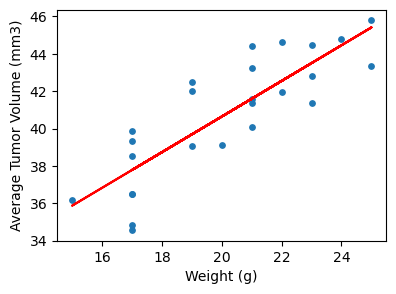

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_groupby_mouseId_df["Weight (g)"],capomulin_groupby_mouseId_df["Tumor Volume (mm3)"])
# print(correlation)
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]:.2f}")

xval = capomulin_groupby_mouseId_df["Weight (g)"]
yval = capomulin_groupby_mouseId_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xval,yval)
regress_values = xval*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(4.25,3))
plt.scatter(xval,yval, s=15)
plt.plot(xval,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
